In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import cv2
import math

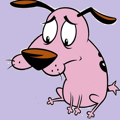

In [2]:
img = Image.open("input_img.jpeg")
height = width = 120
depth = 3
img = img.resize([height, width])
img

### Noise

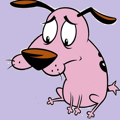

In [3]:
img

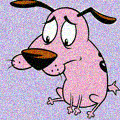

In [4]:
noise1 = np.random.normal(0, 20, [height, width, 3])
noisy_img1 = Image.fromarray((img+noise1).clip(0,255).astype(np.uint8))
noisy_img1

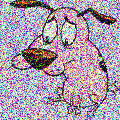

In [5]:
noise2 = np.random.normal(0, 100, [height, width, 3])
noisy_img2 = Image.fromarray((img+noise2).clip(0,255).astype(np.uint8))
noisy_img2

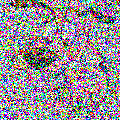

In [6]:
noise3 = np.random.normal(0, 255, [height, width, 3])
noisy_img3 = Image.fromarray((img+noise3).clip(0,255).astype(np.uint8))
noisy_img3

### Gaussian Blue

In [7]:
gauss_img = img.filter(ImageFilter.GaussianBlur(radius=10))

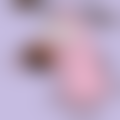

In [8]:
gauss_img

### Defocus Blur

In [9]:
defocus_img = img.filter(ImageFilter.BoxBlur(radius = 10))

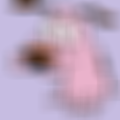

In [10]:
defocus_img

### Motion Blur

In [11]:
kernel = 20
hor = np.zeros((kernel, kernel)) 
hor[int( (kernel - 1) /2 ), :] = np.ones(kernel) 
hor /= kernel
motion_blur = cv2.filter2D(np.asarray(img), -1, hor) 

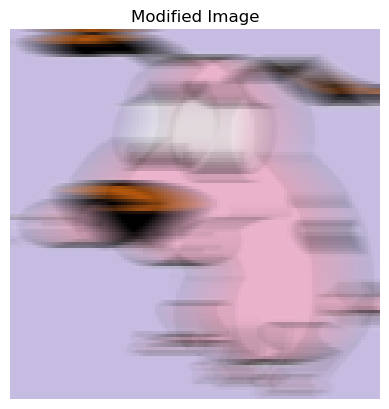

In [12]:
plt.imshow(motion_blur)
plt.title('Modified Image')
plt.axis('off')
plt.show()

### PSNR (Peak Signal to Noise Ratio)

In [13]:
def PSNR(img,blurred_img):
    mse = np.mean((np.array(img)-np.array(blurred_img))**2)
    if mse == 0:
        return 100
    else:
        return 20 * (math.log10(255/math.sqrt(mse)))


### SSIM( Structural Similarity Index Measure)

In [14]:
from skimage.metrics import structural_similarity as ssim
ssim(np.array(img), np.array(defocus_img), data_range=255,channel_axis=2)

0.4064758196287273

### LPIPS (Learned Perceptual Image Patch Similarity)

In [ ]:
import lpips
import torchvision.transforms as t
import torch
LP = lpips.LPIPS()

In [ ]:
transform = t.Compose([
    transforms.PILToTensor()
])

In [ ]:
out = LP(torch.div(transform(img),255),torch.div(transform(defocus_img),255))
out[0][0][0][0]